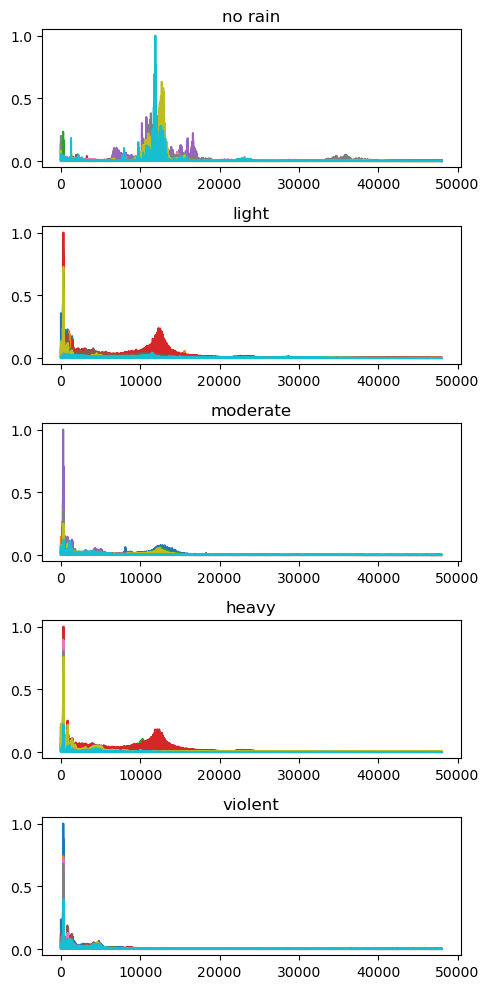

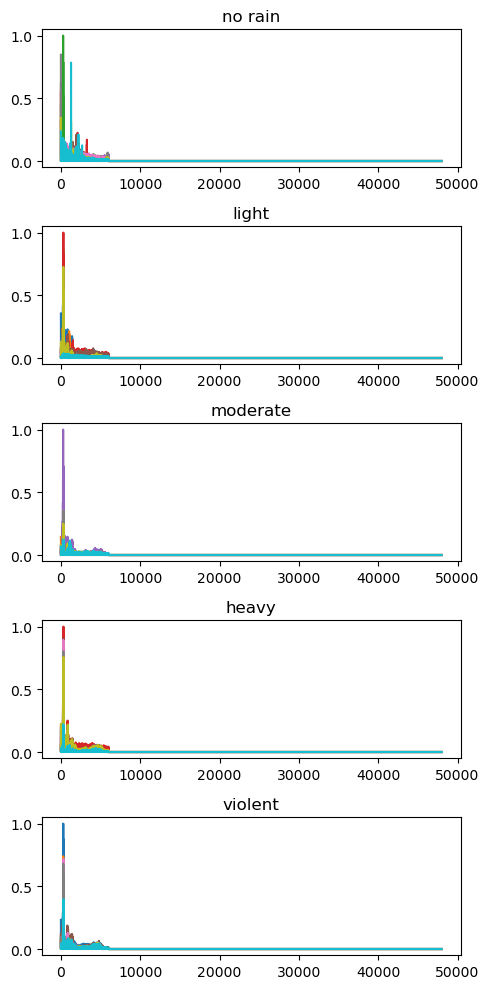

In [2]:
import os
import numpy as np
from scipy.io import wavfile as wav
from numpy.fft import fft

import matplotlib.pyplot as plt

def low_pass_filter(data, sample_rate, cutoff_freq):
    """
    Apply a low-pass filter to the audio signal using FFT.

    Parameters:
    data (numpy.ndarray): The audio signal data.
    sample_rate (int): The sample rate of the audio signal.
    cutoff_freq (float): The cut-off frequency for the low-pass filter.

    Returns:
    numpy.ndarray: The filtered audio signal.
    """
    # Compute the FFT of the data
    data_fft = fft(data)
    
    # Frequency array
    freqs = np.fft.fftfreq(len(data), 1/sample_rate)
    
    # Create a mask for frequencies higher than the cutoff frequency
    mask = np.abs(freqs) > cutoff_freq
    
    # Apply the mask to the FFT data
    data_fft[mask] = 0
    
    # Compute the inverse FFT to get the filtered signal
    filtered_data = np.fft.ifft(data_fft)
    
    # Return the real part of the filtered signal
    return np.real(filtered_data)

def normalize_array(arr):
    """Normalize the values of a NumPy array to the range [0, 1]."""
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    
    # Avoid division by zero in case the array has all identical values
    if arr_min == arr_max:
        return np.zeros_like(arr)
    
    return (arr - arr_min) / (arr_max - arr_min)

def compute_spectra(folder_path, cutoff_freq=None):
    # List to store frequency spectra
    spectra = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            # Read the audio file
            sample_rate, data = wav.read(os.path.join(folder_path, filename))
            # print(f'Processing {filename} with sample rate {sample_rate} Hz')

            if cutoff_freq is not None:
                # Apply a low-pass filter to the audio signal
                data = low_pass_filter(data, sample_rate, cutoff_freq)

            # Compute the FFT of the audio signal
            spectrum = np.abs(fft(data))[:len(data)//2]

            # Append the spectrum to the list
            spectra.append(spectrum)

    # Convert the list of spectra to a numpy array
    spectra_array = normalize_array(np.array(spectra))
    
    return spectra_array

# List of subfolders in the current directory
folder_path = ['no rain', 'light', 'moderate', 'heavy', 'violent']

# Normal frequency range
spectra = []

# Iterate over all subfolders
for folder in folder_path:
    # Compute the spectra for the audio files in the subfolder
    spectra_array = compute_spectra(folder)
    # Append the spectra array to the list
    spectra.append(spectra_array)

# Frequency values for x-axis
freq = np.linspace(0, 48000, len(spectra[0][0]))

# Plotting each row of the numpy array in the spectra list
fig, axs = plt.subplots(len(spectra), 1, figsize=(5, 10))

for i, spectrum in enumerate(spectra):
    for row in spectrum:
        axs[i].plot(freq, row)
        axs[i].set_title(f'{folder_path[i]}')

plt.tight_layout()
plt.show()

# Low pass filter
spectra = []

# Iterate over all subfolders
for folder in folder_path:
    # Compute the spectra for the audio files in the subfolder
    spectra_array = compute_spectra(folder, 3000)
    # Append the spectra array to the list
    spectra.append(spectra_array)

# Plotting each row of the numpy array in the spectra list
fig, axs = plt.subplots(len(spectra), 1, figsize=(5, 10))

for i, spectrum in enumerate(spectra):
    for row in spectrum:
        axs[i].plot(freq, row)
        axs[i].set_title(f'{folder_path[i]}')

plt.tight_layout()
plt.show()